# Initial exploration of our metadata

### Import packages

In [89]:
# Install geopandas
!pip install geopandas cartopy

# Import libraries
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import cartopy.crs as ccrs


  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached Cartopy-0.23.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.0 kB)
  Using cached pyogrio-0.10.0-cp39-cp39-manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached pyproj-3.6.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (31 kB)
  Using cached shapely-2.0.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.0 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
Using cached Cartopy-0.23.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
Using cached pyogrio-0.10.0-cp39-cp39-manylinux_2_28_x86_64.whl (23.9 MB)
Using cached pyproj-3.6.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Using cached shapely-2.0.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.5 MB)


### Load the data

In [4]:
# Load the dataset (assuming it's in the same directory as the notebook)
file_path = './data/fungut_metadata.tsv'
df = pd.read_csv(file_path, sep='\t')  # Use tab separator for .tsv files
df.set_index('ID')
df.head()

,ID,country_sample,state_sample,latitude_sample,longitude_sample,sex_sample,age_years_sample,height_cm_sample,weight_kg_sample,bmi_sample,diet_type_sample,ibd_sample,gluten_sample
0,ERR5327198,USA,TN,36.1,-86.8,female,67,152,41,17.75,Omnivore,I do not have this condition,No
1,ERR5327199,USA,DC,38.9,-77.1,male,55.0,182.0,79.0,23.73,Omnivore,I do not have this condition,I was diagnosed with gluten allergy (anti-glut...
2,ERR5327266,USA,VA,38.9,-77.1,female,28.0,175.0,61.0,19.94,Omnivore,I do not have this condition,I do not eat gluten because it makes me feel bad
3,ERR5327282,United Kingdom,Not provided,51.6,-0.2,female,26.0,166.0,60.0,21.77,Omnivore,I do not have this condition,No
4,ERR5327284,United Kingdom,Not provided,51.5,-0.2,female,25.0,173.0,59.0,20.01,Vegetarian but eat seafood,I do not have this condition,No


In [7]:
# Get the column names and datatypes
print("\nColumn names and data types:")
print("------------------------------")
df.info()

# Get some basic statistics
print("\nBasic statistics for numerical columns:")
print("-----------------------------------------")
display(df.describe())


Column names and data types:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                150 non-null    object
 1   country_sample    150 non-null    object
 2   state_sample      150 non-null    object
 3   latitude_sample   150 non-null    object
 4   longitude_sample  150 non-null    object
 5   sex_sample        150 non-null    object
 6   age_years_sample  150 non-null    object
 7   height_cm_sample  150 non-null    object
 8   weight_kg_sample  150 non-null    object
 9   bmi_sample        150 non-null    object
 10  diet_type_sample  150 non-null    object
 11  ibd_sample        150 non-null    object
 12  gluten_sample     150 non-null    object
dtypes: object(13)
memory usage: 15.4+ KB

Basic statistics for numerical columns:
-----------------------------------------


,ID,country_sample,state_sample,latitude_sample,longitude_sample,sex_sample,age_years_sample,height_cm_sample,weight_kg_sample,bmi_sample,diet_type_sample,ibd_sample,gluten_sample
count,150,150,150,150,150,150,150,150,150,150,150,150,150
unique,150,8,30,86,81,4,64,47,70,135,6,4,5
top,ERR5327198,United Kingdom,Not provided,51.5,145.0,male,55.0,180.0,63.0,Not provided,Omnivore,I do not have this condition,No
freq,1,54,58,14,5,79,6,15,8,3,118,130,113


In [8]:
# As all are of type object, we need to do some data type wrangling
# Convert all these to float
df['latitude_sample']  = pd.to_numeric(df['latitude_sample'],  errors='coerce')  
df['longitude_sample'] = pd.to_numeric(df['longitude_sample'], errors='coerce')  
df['age_years_sample'] = pd.to_numeric(df['age_years_sample'], errors='coerce')  
df['height_cm_sample'] = pd.to_numeric(df['height_cm_sample'], errors='coerce')  
df['weight_kg_sample'] = pd.to_numeric(df['weight_kg_sample'], errors='coerce')  
df['bmi_sample'] = pd.to_numeric(df['bmi_sample'], errors='coerce')              

# And convert all these to category
df['country_sample'] = df['country_sample'].astype('category')
df['state_sample'] = df['state_sample'].astype('category')
df['sex_sample'] = df['sex_sample'].astype('category')
df['diet_type_sample'] = df['diet_type_sample'].astype('category')
df['ibd_sample'] = df['ibd_sample'].astype('category')
df['gluten_sample'] = df['gluten_sample'].astype('category')

# Display the updated data types
print("\nUpdated data types:")
print(df.dtypes)


Updated data types:
ID                    object
country_sample      category
state_sample        category
latitude_sample      float64
longitude_sample     float64
sex_sample          category
age_years_sample     float64
height_cm_sample     float64
weight_kg_sample     float64
bmi_sample           float64
diet_type_sample    category
ibd_sample          category
gluten_sample       category
dtype: object


## Now to the juicy party
### Let's see how our data ist distributed

## Numerical data visualizations

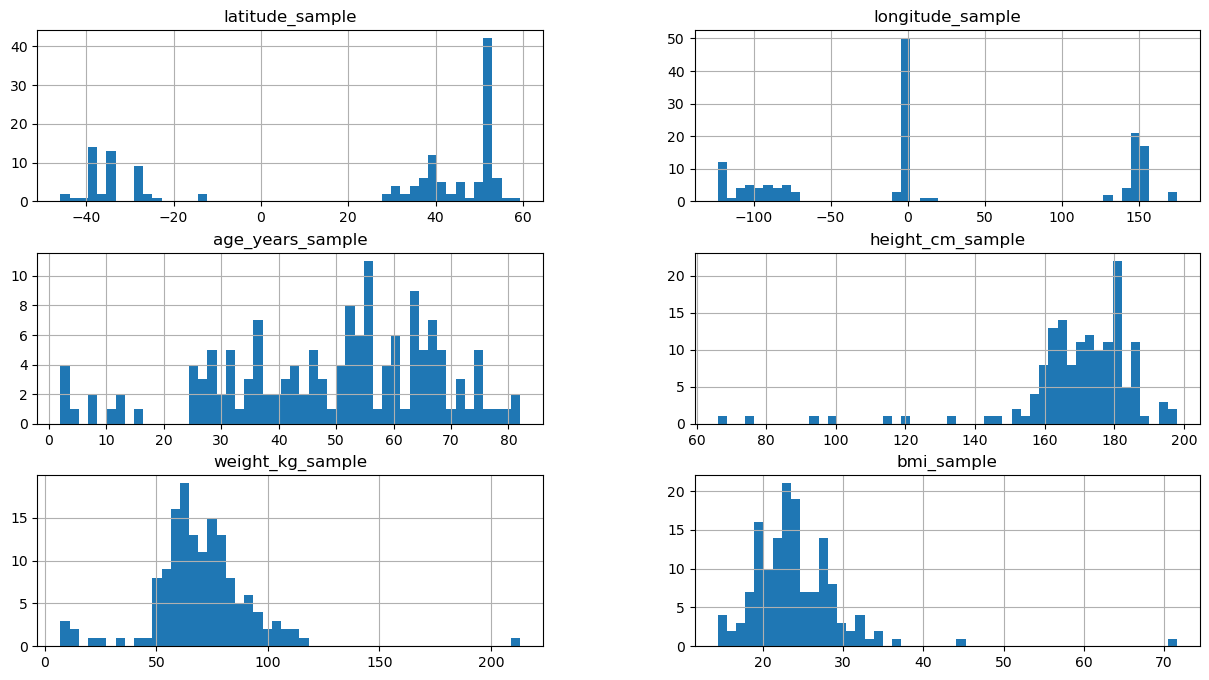

In [13]:
# with .hist we can easly get histograms of all numerical variables of our dataset
df.hist(bins=50, figsize=(15,8))
plt.show()

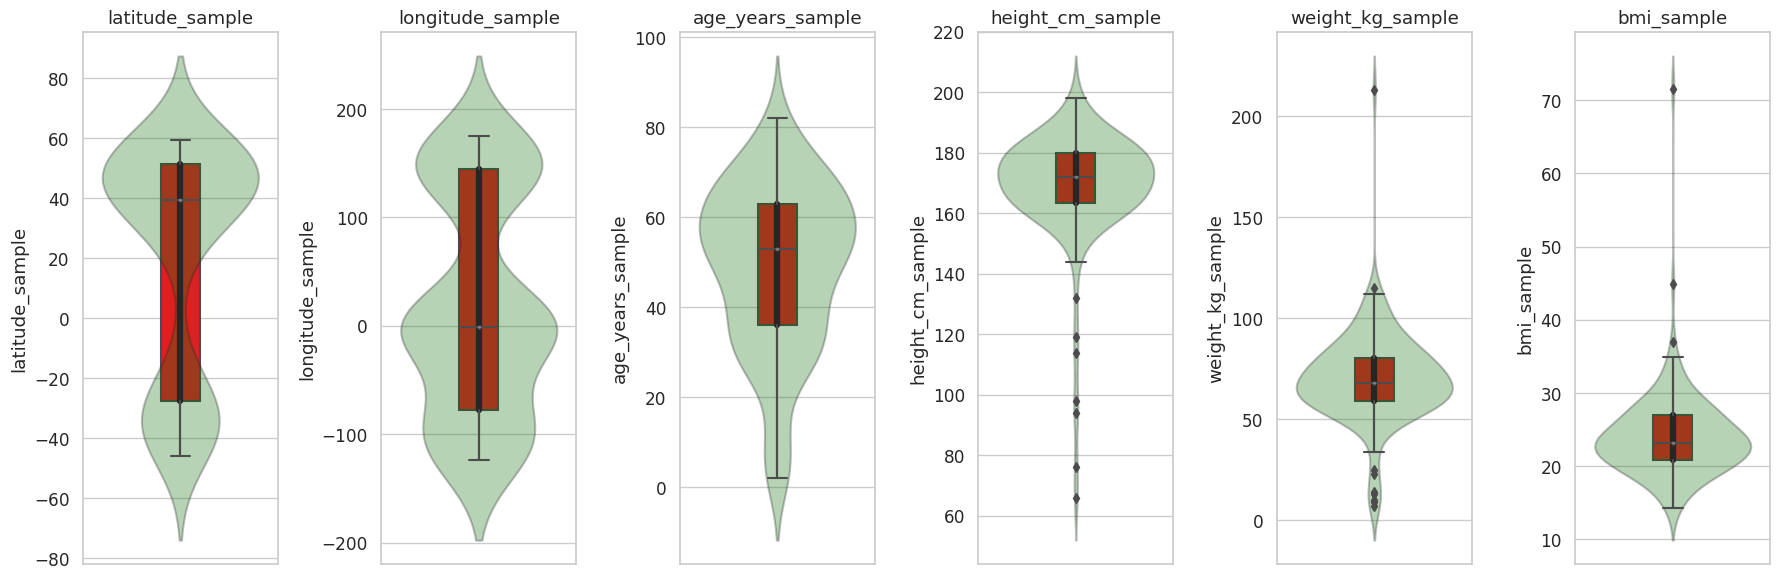

In [59]:
numerical_cols = ['latitude_sample', 'longitude_sample', 'age_years_sample', 
                  'height_cm_sample', 'weight_kg_sample', 'bmi_sample']

fig, axes = plt.subplots(1, 6, figsize=(18, 6))
axes = axes.flatten()

# Loop through each column and create a violin plot with transparency and an overlaid boxplot
for i, col in enumerate(numerical_cols):
    violin = sns.violinplot(data=df, y=col, ax=axes[i], color='green')
    # Set transparency for the violin, so that we can see the boxplot better
    for patch in violin.collections:
        patch.set_alpha(0.3)
    # lay the boxplot over it
    sns.boxplot(data=df, y=col, ax=axes[i], color='red', width=0.2)
    
    # set the plot title
    axes[i].set_title(col)

plt.tight_layout()
plt.savefig('./plots/boxplot_numerical_data.png')
plt.show()


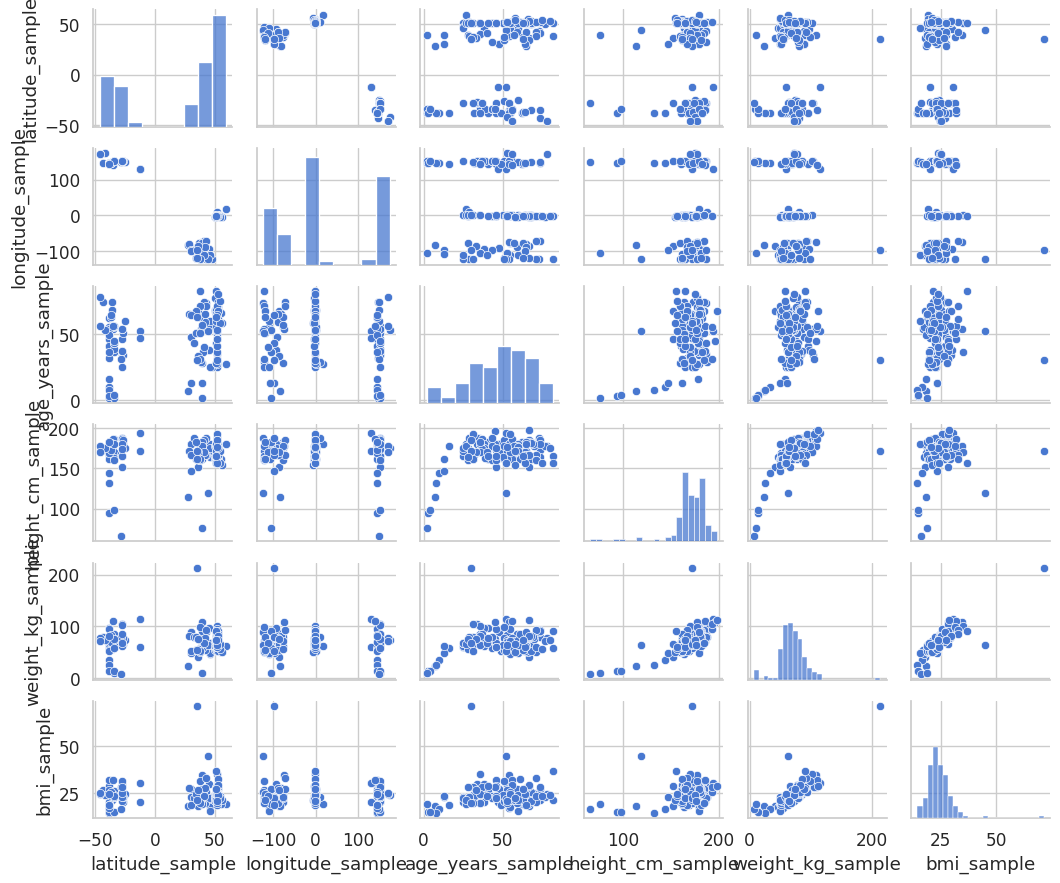

In [58]:
# Disregard warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Easy pairplot between numerical variables
sns.pairplot(df, height=1.5, aspect=1.2)
plt.show()

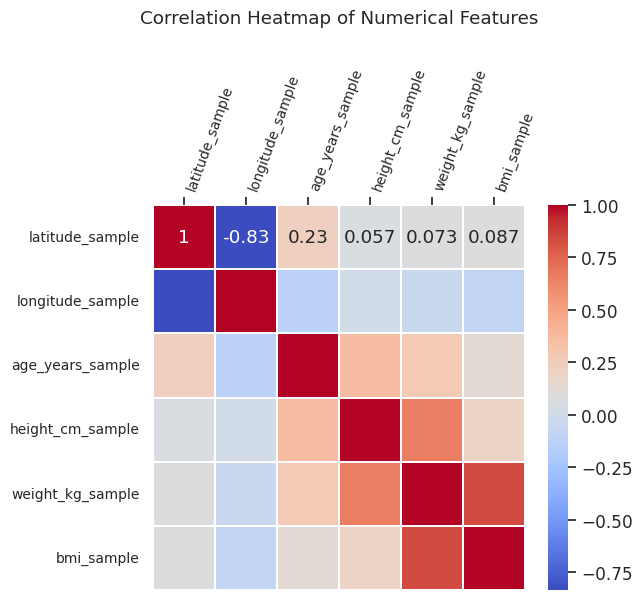

In [69]:
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(6, 5))

ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.3)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top') 

plt.xticks(rotation=70, ha='left', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Heatmap of Numerical Features', pad=30)
plt.show()

## Categorical data visualizations

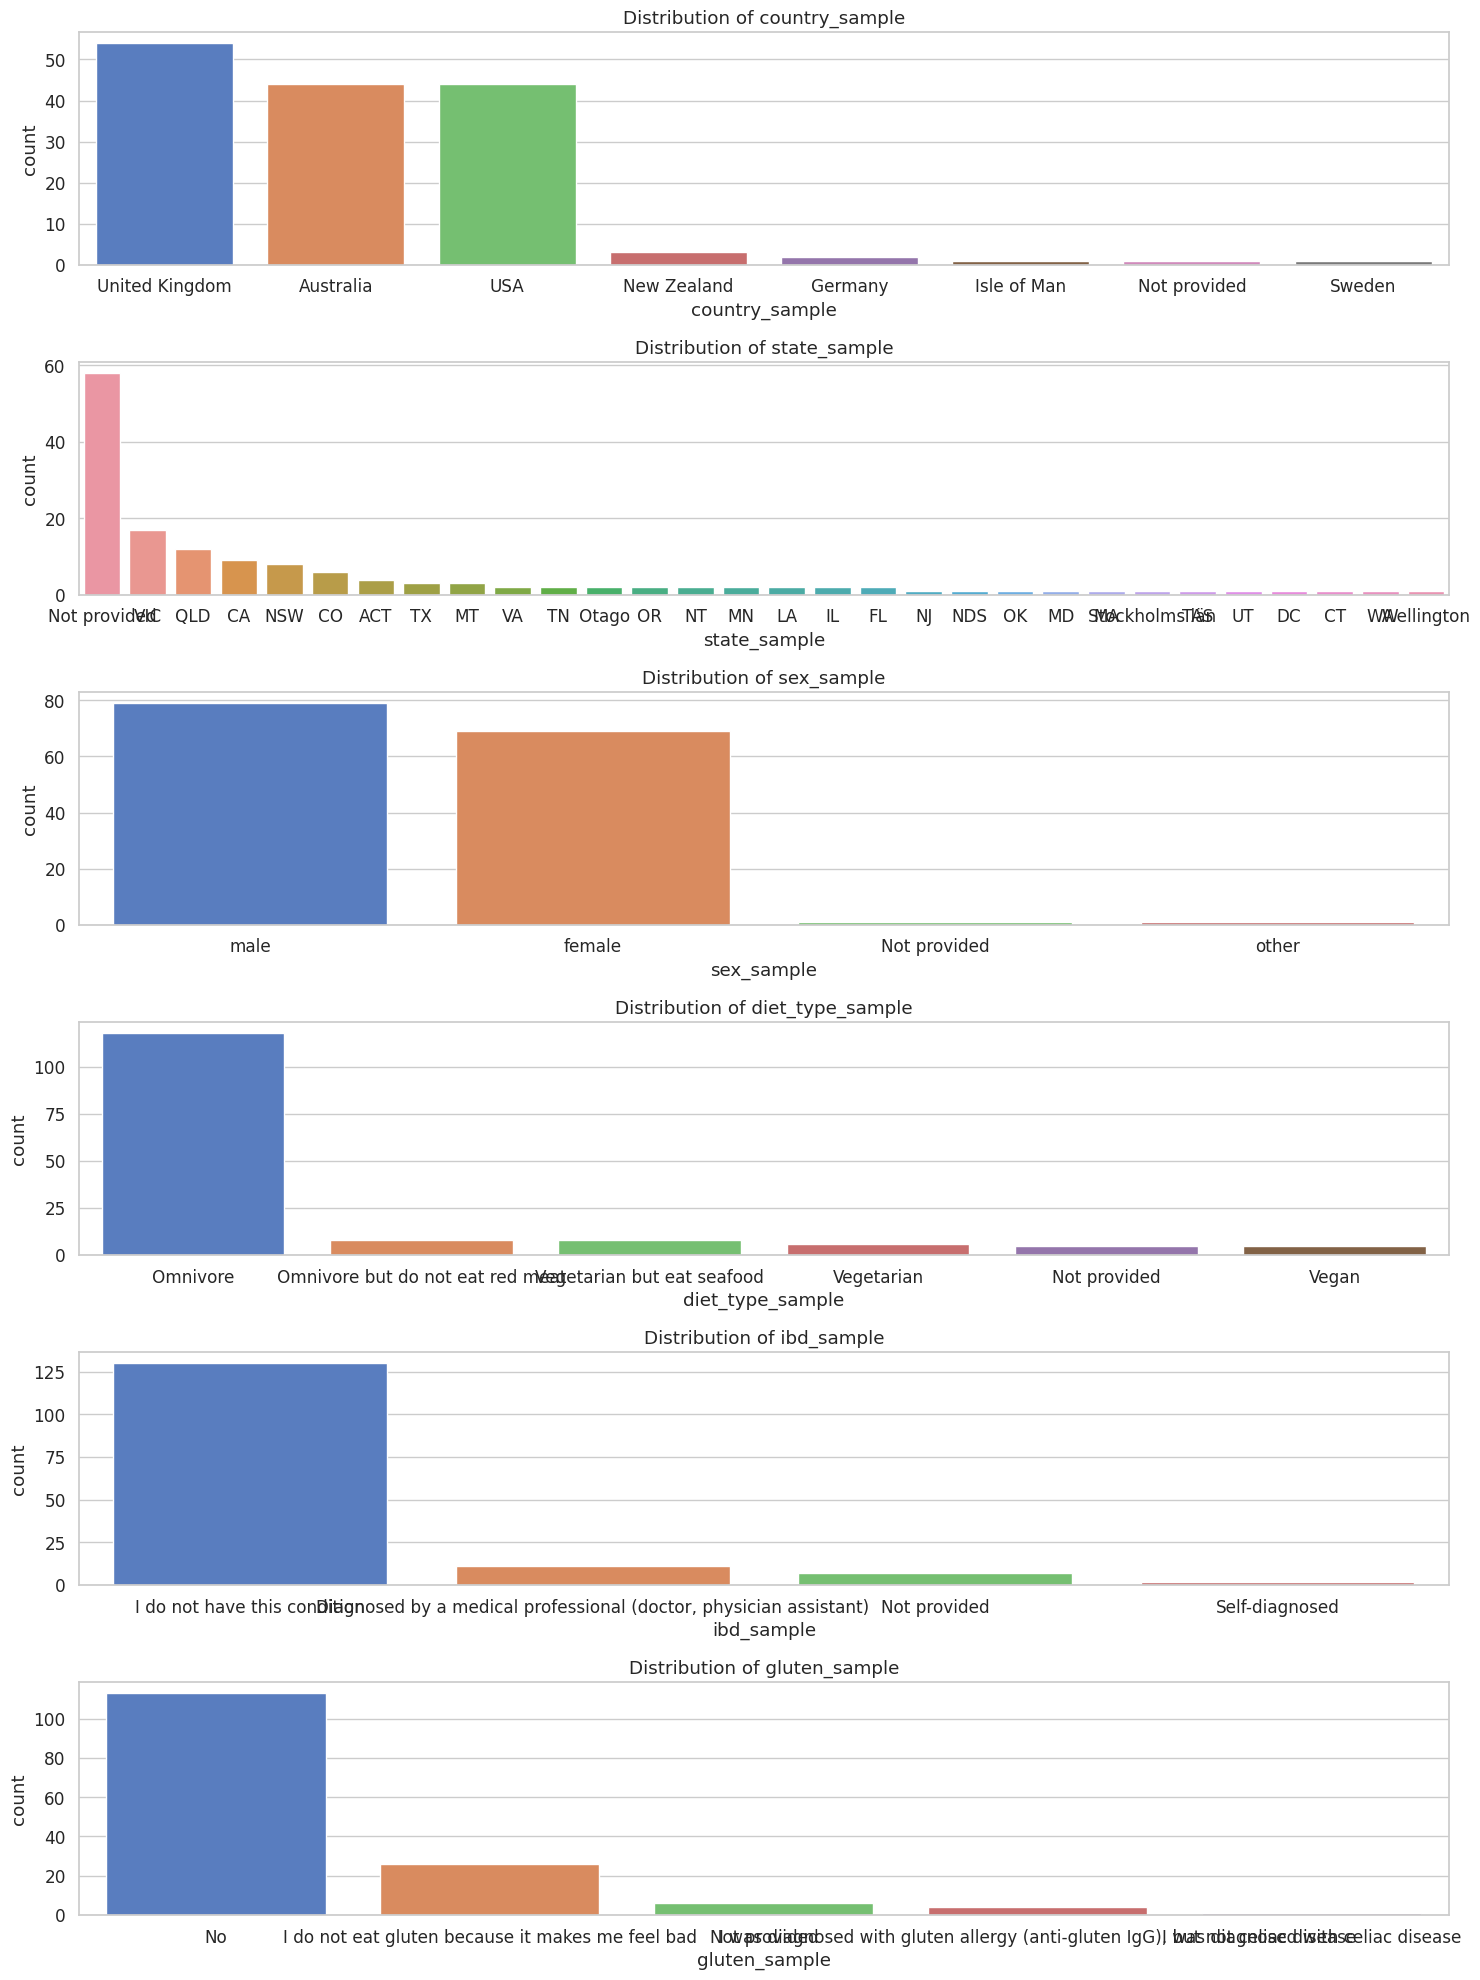

In [71]:
# Define the categorical variables
categorical_cols = ['country_sample', 'state_sample', 'sex_sample', 'diet_type_sample', 'ibd_sample', 'gluten_sample']

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    
plt.show()

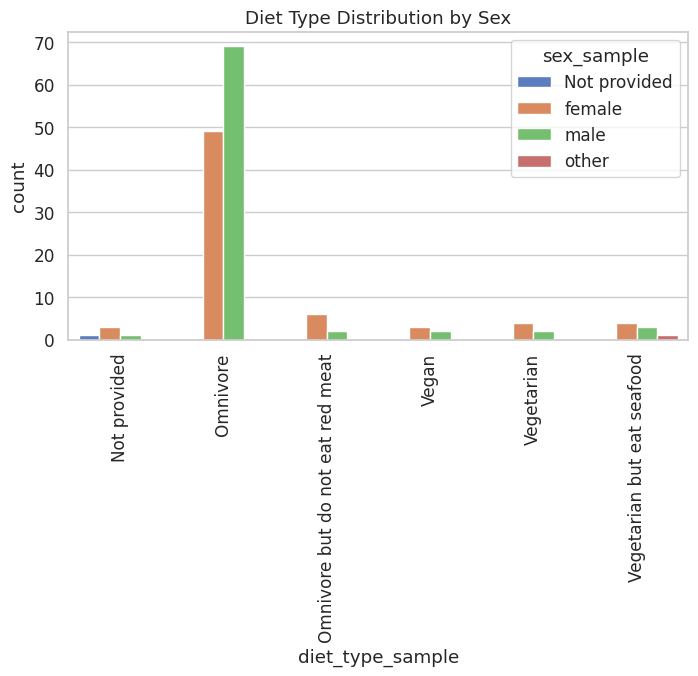

In [82]:
# Grouped bar plot for diet_type_sample and sex_sample
plt.figure(figsize=(8, 4))
sns.countplot(x='diet_type_sample', hue='sex_sample', data=df)
plt.title('Diet Type Distribution by Sex')
plt.xticks(rotation=90)
plt.show()


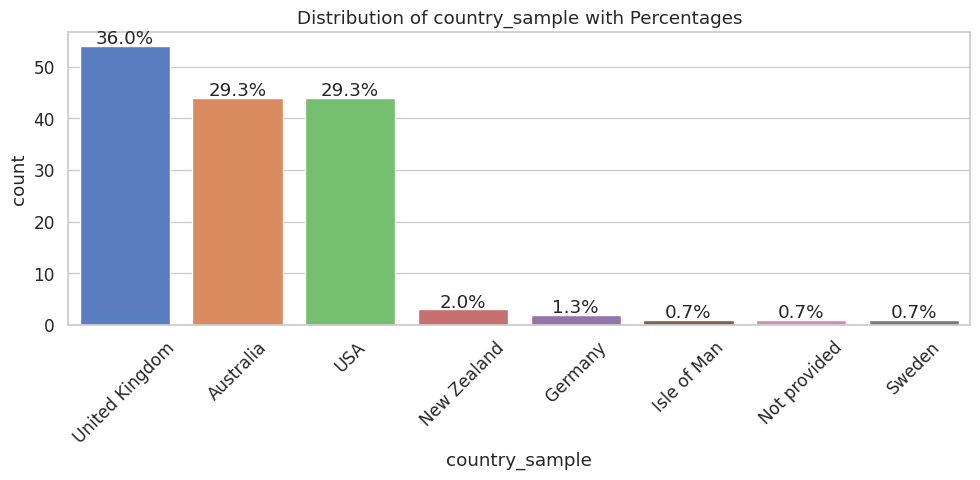

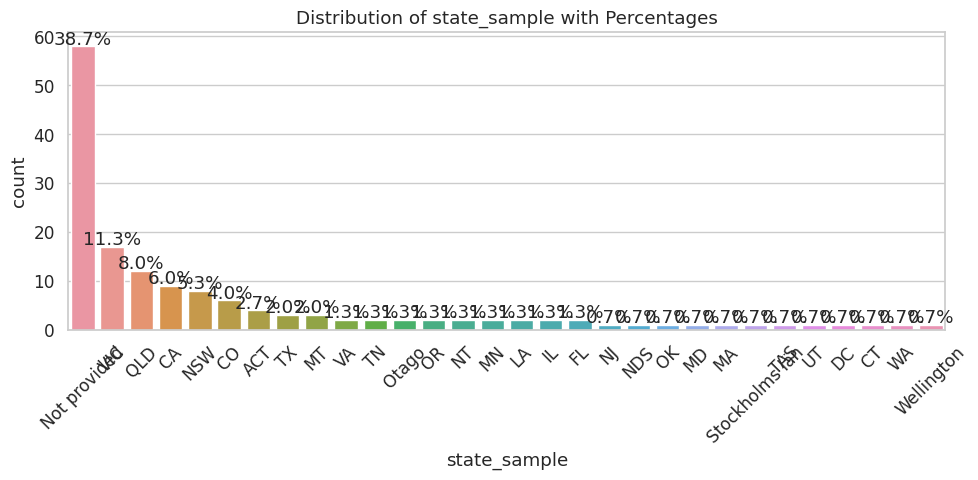

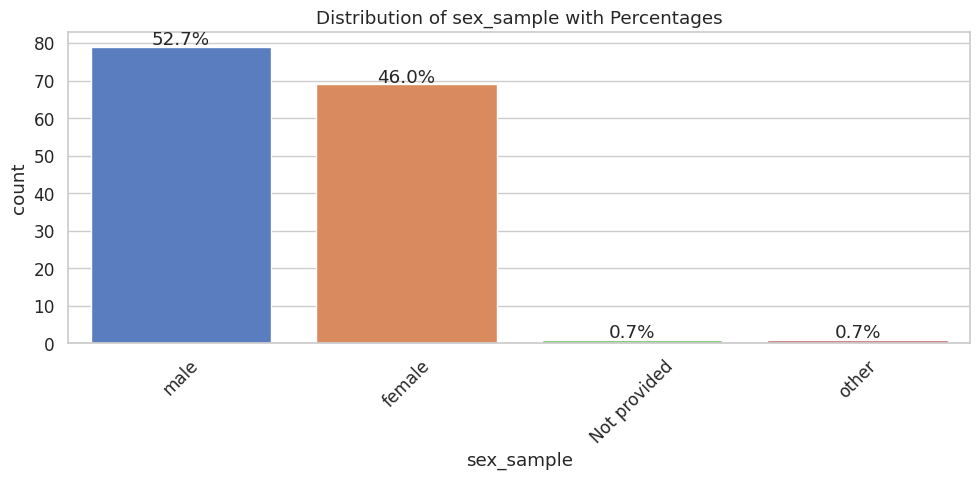

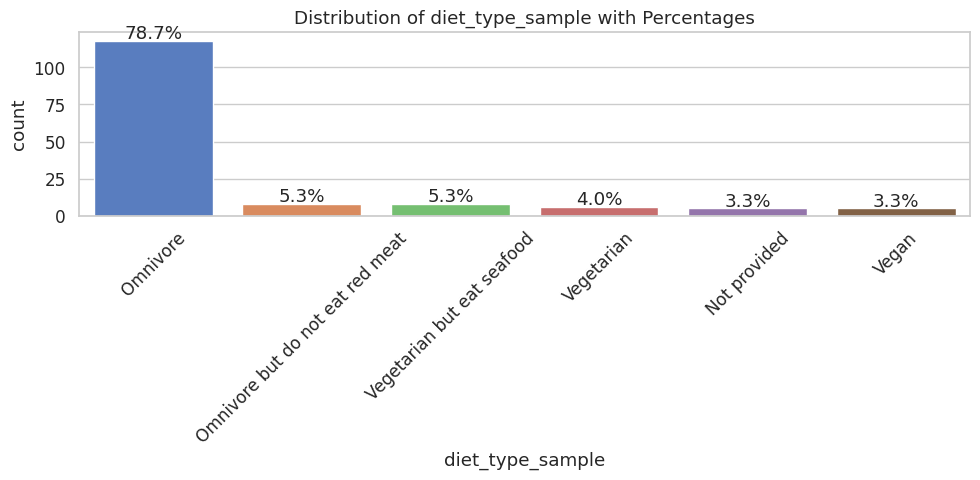

/tmp/ipykernel_33345/477067984.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


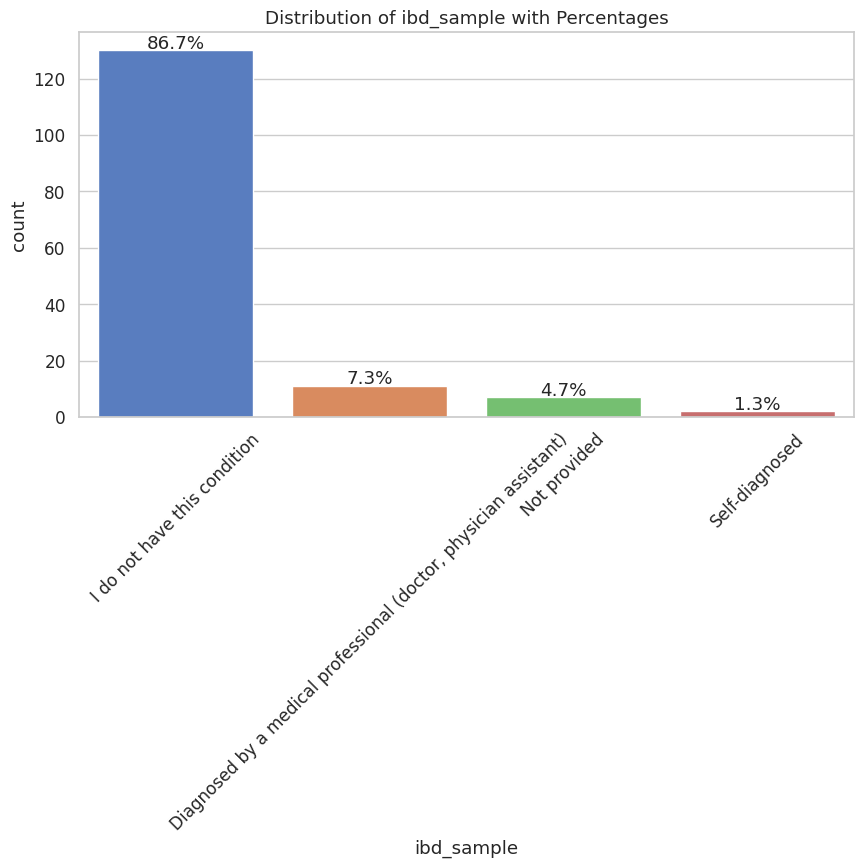

/tmp/ipykernel_33345/477067984.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


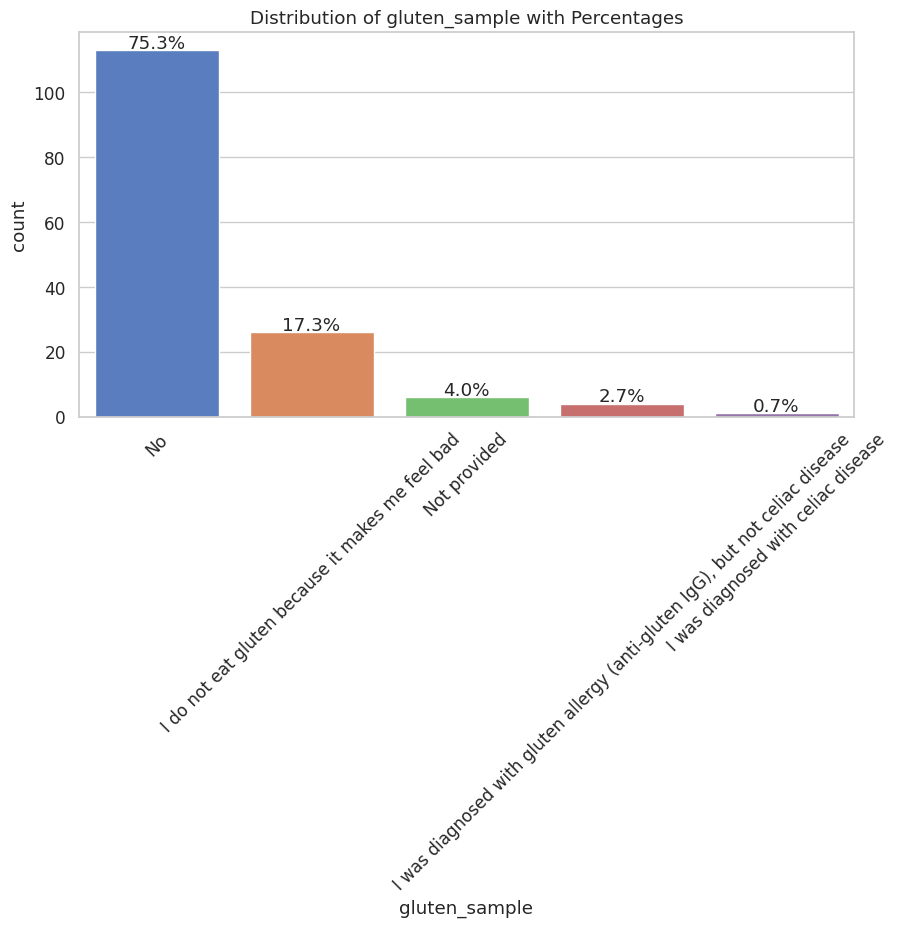

In [86]:
# Bar plot with percentage annotations
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=df[col], order=df[col].value_counts().index)
    total = len(df[col])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * (p.get_height() / total))
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.title(f'Distribution of {col} with Percentages')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Geographical analysis

In [101]:
# Load the shapefile for urban areas we got from Natural Earth
urban_areas = gpd.read_file('./data/urban_areas/ne_10m_urban_areas.shp')

# Convert latitude and longitude columns in df to a GeoDataFrame and set CRS to EPSG:4326 (standard with long and lat data)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude_sample'], df['latitude_sample']), crs="EPSG:4326")

# Join to classify points as urban or rural
gdf['is_urban'] = gpd.sjoin(gdf, urban_areas, predicate='within', how='left').index_right.notnull()

# Make a new data column in our df that is boolean
df['is_urban'] = gdf['is_urban'].astype(bool)

# Split up the points into urban and rural for later plotting
urban_points = gdf[gdf['is_urban']]
rural_points = gdf[~gdf['is_urban']]


In [109]:
# Check the distribution of the classification of urban/rural
distribution = df['is_urban'].value_counts()
print(distribution)

is_urban
True     79
False    71
Name: count, dtype: int64


/tmp/ipykernel_33345/1561646972.py:15: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


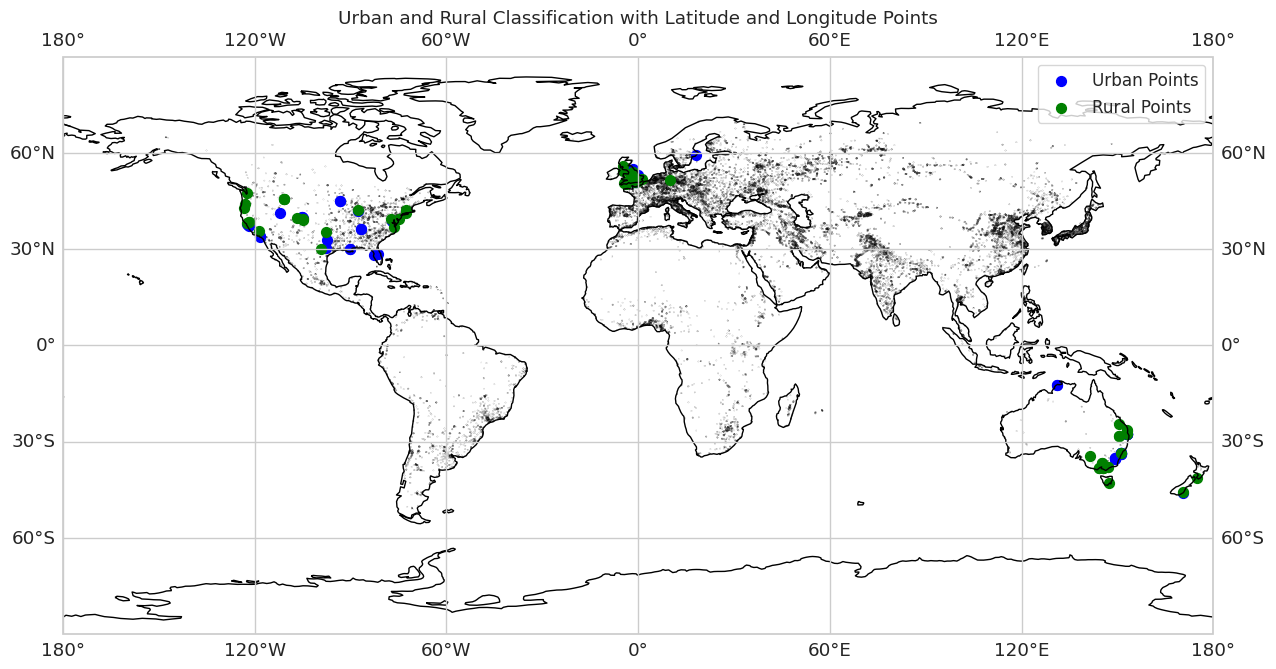

In [119]:
# Create a figure with the Cartopy PlateCarree projection
fig, ax = plt.subplots(figsize=(15, 7.5), subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_global() # display the whole world map
ax.coastlines() # display the coastline
ax.gridlines(draw_labels=True)

# Plot the urban areas shapefile
urban_areas.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.6, label='Urban Area')

# Plot the urban and rural points
urban_points.plot(ax=ax, color='blue', markersize=50, label='Urban Points')
rural_points.plot(ax=ax, color='green', markersize=50, label='Rural Points')

plt.legend()
plt.title('Urban and Rural Classification with Latitude and Longitude Points')
plt.show()
